### Image classification using vgg16 with transfer learning

### Step 1: Importing Libraries 

In [0]:
#importing libraries 

import tensorflow as tf
import os
import sklearn.datasets
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing import image
from tensorflow.keras import layers
from tensorflow.keras import Model
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from keras.optimizers import SGD
from keras.datasets import cifar10
#import zipfile
from keras import optimizers
from keras.applications import VGG16
%matplotlib inline
import random
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

### Step 2: Mounting Google drive 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
# Path where whole data set lies 
base_dir = '/content/gdrive/My Drive/Assignment2-13663024/flower_dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)


# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir , # This is the source directory for training images
        target_size= (150,150),  # All images will be resized to 150x150
        batch_size=20,
        class_mode='categorical')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(150,150),
        batch_size=20,
        class_mode='categorical')



Found 680 images belonging to 17 classes.
Found 340 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


### Step : Transfer learning

We will use the VGG16 CNN architecture as the base model and adapt/re-train the FC layers to flower data set classification task.

VGG16 CNN architecture is given below:

![alt text](https://neurohive.io/wp-content/uploads/2018/11/vgg16.png)

In [0]:
#Base model with Transfer Learning 
# 4) Experimental Settings
#creating vgg model with input shape (150,150,3)

from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))


from keras import models
from keras import layers
from keras import optimizers

# Load the CONV layers of VGG16 model and add the FC layers

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(17, activation='softmax'))



58892288/58889256 [==============================] - 6s 0us/step


In [0]:
conv_base.summary()
for layer in conv_base.layers[:-4]: #freezing first 4 layers till conv 4-1
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in conv_base.layers:
    print(layer, layer.trainable)

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
# Train the model with 10 epochs 
history = model.fit_generator(
      train_generator,
      steps_per_epoch=34,  
      epochs=10,
      validation_data=validation_generator,
      validation_steps=17,  
      verbose=2)

Epoch 1/10
 - 508s - loss: 1.8249 - acc: 0.4485 - val_loss: 0.6963 - val_acc: 0.7471
Epoch 2/10
 - 250s - loss: 0.4503 - acc: 0.8721 - val_loss: 1.4806 - val_acc: 0.6176
Epoch 3/10
 - 250s - loss: 0.1516 - acc: 0.9632 - val_loss: 1.2906 - val_acc: 0.7471
Epoch 4/10
 - 250s - loss: 0.1103 - acc: 0.9779 - val_loss: 0.3276 - val_acc: 0.8529
Epoch 5/10
 - 250s - loss: 0.1103 - acc: 0.9794 - val_loss: 1.2069 - val_acc: 0.7824
Epoch 6/10
 - 250s - loss: 0.0381 - acc: 0.9897 - val_loss: 0.0896 - val_acc: 0.8559
Epoch 7/10
 - 251s - loss: 4.9532e-04 - acc: 1.0000 - val_loss: 0.4023 - val_acc: 0.8824
Epoch 8/10
 - 251s - loss: 1.0617e-04 - acc: 1.0000 - val_loss: 2.0446 - val_acc: 0.7441
Epoch 9/10
 - 251s - loss: 0.1237 - acc: 0.9794 - val_loss: 0.1182 - val_acc: 0.8765
Epoch 10/10
 - 250s - loss: 2.1497e-04 - acc: 1.0000 - val_loss: 0.0800 - val_acc: 0.8706


### Step: Visualization of results

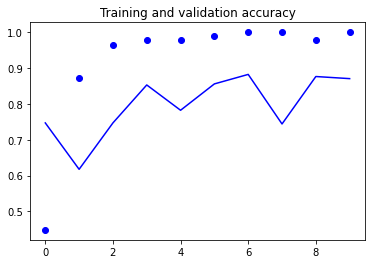

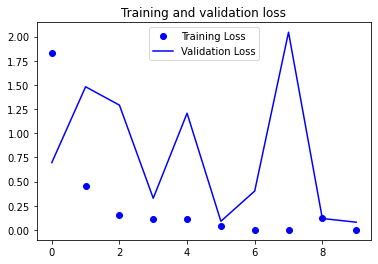

In [0]:
#visualisation with 10 epochs 

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
# Train the model with 20 epochs without image augmentation 
history_20 = model.fit_generator(
      train_generator,
      steps_per_epoch=34,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=17,  
      verbose=2)

Epoch 1/20
 - 377s - loss: 1.8773 - acc: 0.4279 - val_loss: 0.8811 - val_acc: 0.6559
Epoch 2/20
 - 8s - loss: 0.5960 - acc: 0.8412 - val_loss: 0.5211 - val_acc: 0.7088
Epoch 3/20
 - 8s - loss: 0.1450 - acc: 0.9618 - val_loss: 0.4489 - val_acc: 0.8000
Epoch 4/20
 - 8s - loss: 0.0812 - acc: 0.9779 - val_loss: 0.8333 - val_acc: 0.8500
Epoch 5/20
 - 8s - loss: 0.1090 - acc: 0.9735 - val_loss: 0.3912 - val_acc: 0.7618
Epoch 6/20
 - 8s - loss: 0.0734 - acc: 0.9912 - val_loss: 0.3142 - val_acc: 0.8588
Epoch 7/20
 - 8s - loss: 4.9715e-04 - acc: 1.0000 - val_loss: 0.2257 - val_acc: 0.8735
Epoch 8/20
 - 8s - loss: 7.3585e-05 - acc: 1.0000 - val_loss: 0.9644 - val_acc: 0.8618
Epoch 9/20
 - 8s - loss: 0.0024 - acc: 0.9985 - val_loss: 11.1772 - val_acc: 0.2206
Epoch 10/20
 - 8s - loss: 0.2366 - acc: 0.9735 - val_loss: 0.0235 - val_acc: 0.8794
Epoch 11/20
 - 8s - loss: 2.2789e-04 - acc: 1.0000 - val_loss: 0.7173 - val_acc: 0.8853
Epoch 12/20
 - 8s - loss: 3.2847e-05 - acc: 1.0000 - val_loss: 1.6532 

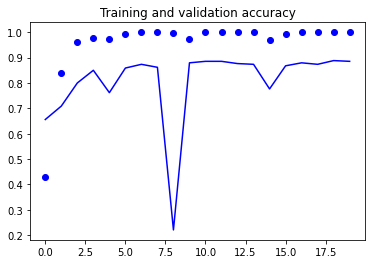

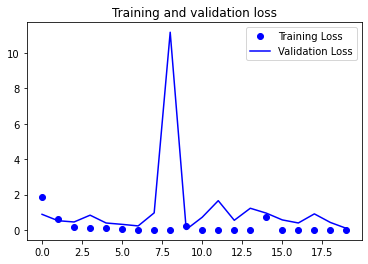

In [0]:
#visualisation with 20 epochs 

import matplotlib.pyplot as plt
acc = history_20.history['acc']
val_acc = history_20.history['val_acc']
loss = history_20.history['loss']
val_loss = history_20.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
#customization of vgg by adding dense layer of 512 filter size 
# 5) Experimental Setting
from keras.layers import Convolution2D as Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))


from keras import models
from keras import layers
from keras import optimizers

model_cust = models.Sequential()
model_cust.add(conv_base)
model_cust.add(layers.Conv2D(64, (3,3), padding="same", activation='relu'))#customization 2
model_cust.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_cust.add(Dropout(0.5))

model_cust.add(layers.Flatten())
model_cust.add(layers.Dense(256, activation='relu'))
model_cust.add(layers.Dense(512, activation='relu'))
model_cust.add(layers.Dense(17, activation='softmax'))


In [0]:
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
       
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 680 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


In [0]:
# customized vgg with RMSprop as optimizer
model_cust.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
callback_base = EarlyStopping(monitor='val_acc',
                         patience=2,
                         restore_best_weights=True)

In [0]:
# Train the model and the optimizer to be RMS prop
history_cust = model_cust.fit_generator(
      train_generator,
      steps_per_epoch=34,  
      epochs=20,
      validation_data=validation_generator,
      validation_steps=17,  
      #callbacks = [callback_base],
      verbose=2)

Epoch 1/20
 - 120s - loss: 2.8658 - acc: 0.0691 - val_loss: 2.8541 - val_acc: 0.0441
Epoch 2/20
 - 15s - loss: 2.8423 - acc: 0.0515 - val_loss: 2.8296 - val_acc: 0.0765
Epoch 3/20
 - 14s - loss: 2.8351 - acc: 0.0412 - val_loss: 2.8333 - val_acc: 0.0588
Epoch 4/20
 - 14s - loss: 2.8334 - acc: 0.0441 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 5/20
 - 14s - loss: 2.8334 - acc: 0.0515 - val_loss: 2.8329 - val_acc: 0.0588
Epoch 6/20
 - 14s - loss: 2.8334 - acc: 0.0368 - val_loss: 2.8334 - val_acc: 0.0588
Epoch 7/20
 - 14s - loss: 2.8334 - acc: 0.0588 - val_loss: 2.8335 - val_acc: 0.0588
Epoch 8/20
 - 14s - loss: 2.8334 - acc: 0.0471 - val_loss: 2.8333 - val_acc: 0.0588
Epoch 9/20
 - 14s - loss: 2.8334 - acc: 0.0485 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 10/20
 - 14s - loss: 2.8334 - acc: 0.0471 - val_loss: 2.8332 - val_acc: 0.0588
Epoch 11/20
 - 14s - loss: 2.8334 - acc: 0.0485 - val_loss: 2.8334 - val_acc: 0.0588
Epoch 12/20
 - 14s - loss: 2.8334 - acc: 0.0426 - val_loss: 2.8332 - val_

In [0]:
#6) Experimental Settings
#customization of vgg by adding layer 

from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))


from keras import models
from keras import layers
from keras import optimizers

model_cust1 = models.Sequential()
model_cust1.add(conv_base)
#model_cust1.add(layers.Conv2D(512, (3,3), padding="same", activation='relu'))#customization 
model_cust1.add(layers.Flatten())
model_cust1.add(layers.Dense(256, activation='relu'))
model_cust1.add(layers.Dense(512, activation='relu'))#customization 1
model_cust1.add(layers.Dense(17, activation='softmax'))

In [0]:
# Updated to do image augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
       
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='categorical')

Found 680 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


In [0]:
# customized vgg with RMSprop as optimizer
model_cust1.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
callback_base = EarlyStopping(monitor='val_acc',
                         patience=2,
                         restore_best_weights=True)

In [0]:
# Train the model and the optimizer to be RMS prop
history_cust = model_cust1.fit_generator(
      train_generator,
      steps_per_epoch=34,  
      epochs=10,
      validation_data=validation_generator,
      validation_steps=17,  
      callbacks = [callback_base],
      verbose=2)

Epoch 1/10
 - 654s - loss: 2.6961 - acc: 0.1426 - val_loss: 2.3783 - val_acc: 0.1794
Epoch 2/10
 - 653s - loss: 2.1976 - acc: 0.2691 - val_loss: 1.8415 - val_acc: 0.3382
Epoch 3/10
 - 652s - loss: 1.7488 - acc: 0.4147 - val_loss: 1.2088 - val_acc: 0.4647
Epoch 4/10
 - 656s - loss: 1.4050 - acc: 0.5250 - val_loss: 1.2491 - val_acc: 0.5441
Epoch 5/10
 - 648s - loss: 1.0187 - acc: 0.6588 - val_loss: 3.1550 - val_acc: 0.5471
Epoch 6/10
 - 647s - loss: 0.9897 - acc: 0.6735 - val_loss: 0.9777 - val_acc: 0.6647
Epoch 7/10
 - 647s - loss: 0.9428 - acc: 0.6897 - val_loss: 0.9844 - val_acc: 0.7441
Epoch 8/10
 - 650s - loss: 0.8258 - acc: 0.7397 - val_loss: 0.5223 - val_acc: 0.7647
Epoch 9/10
 - 664s - loss: 0.7865 - acc: 0.7824 - val_loss: 0.4256 - val_acc: 0.8176
Epoch 10/10
 - 651s - loss: 0.6460 - acc: 0.7971 - val_loss: 0.6719 - val_acc: 0.8294


In [0]:
#customization of vgg by adding layer 
# 7) Experimental Settings
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',include_top=False, input_shape=(150, 150, 3))


from keras import models
from keras import layers
from keras import optimizers

model_cust2 = models.Sequential()
model_cust2.add(conv_base)
model_cust2.add(layers.Conv2D(64, (3,3), padding="same", activation='relu'))#customization 2
model_cust2.add(layers.MaxPooling2D(pool_size=(2, 2)))
model_cust2.add(layers.Flatten())
model_cust2.add(layers.Dense(256, activation='relu'))
model_cust2.add(layers.Dense(512, activation='relu'))#customization 1
model_cust2.add(layers.Dense(17, activation='softmax'))

In [0]:
# customized vgg with RMSprop as optimizer
model_cust2.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [0]:
callback_custom = EarlyStopping(monitor='val_acc',
                         patience=2,
                         restore_best_weights=True)

In [0]:
# Train the model and the optimizer to be RMS prop
history_cust = model_cust2.fit_generator(
      train_generator,
      steps_per_epoch=34,  
      epochs=10,
      validation_data=validation_generator,
      validation_steps=17,  
      callbacks = [callback_custom],
      verbose=2)

Epoch 1/10
 - 520s - loss: 2.8427 - acc: 0.0632 - val_loss: 2.8133 - val_acc: 0.0735
Epoch 2/10
 - 544s - loss: 2.7428 - acc: 0.1088 - val_loss: 2.4774 - val_acc: 0.1206
Epoch 3/10
 - 553s - loss: 2.4062 - acc: 0.2088 - val_loss: 2.4005 - val_acc: 0.2118
Epoch 4/10
 - 556s - loss: 2.0751 - acc: 0.3103 - val_loss: 2.0960 - val_acc: 0.2941
Epoch 5/10
 - 546s - loss: 1.8403 - acc: 0.3853 - val_loss: 1.3049 - val_acc: 0.5382
Epoch 6/10
 - 546s - loss: 1.5721 - acc: 0.4838 - val_loss: 1.7677 - val_acc: 0.5029
Epoch 7/10
 - 544s - loss: 1.3016 - acc: 0.5603 - val_loss: 0.9830 - val_acc: 0.6265
Epoch 8/10
 - 549s - loss: 1.1729 - acc: 0.6279 - val_loss: 0.7788 - val_acc: 0.6559
Epoch 9/10
 - 547s - loss: 0.9680 - acc: 0.7029 - val_loss: 0.6114 - val_acc: 0.7353
Epoch 10/10
 - 537s - loss: 0.8670 - acc: 0.7279 - val_loss: 1.0109 - val_acc: 0.7118
